In [8]:
%load_ext autoreload
%autoreload 2

from evolution.evolution import Population
import pickle
import typing as t
import os
import pandas as pd
import matplotlib.pyplot as plt
import gp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
def iterate_lineage(dirname: str) -> t.Generator[Population, None, None]:
    files = os.listdir(dirname)
    files.sort()
    for file in files:
        with open(f"{dirname}/{file}", "rb") as f:
            population = pickle.load(f)
        yield population

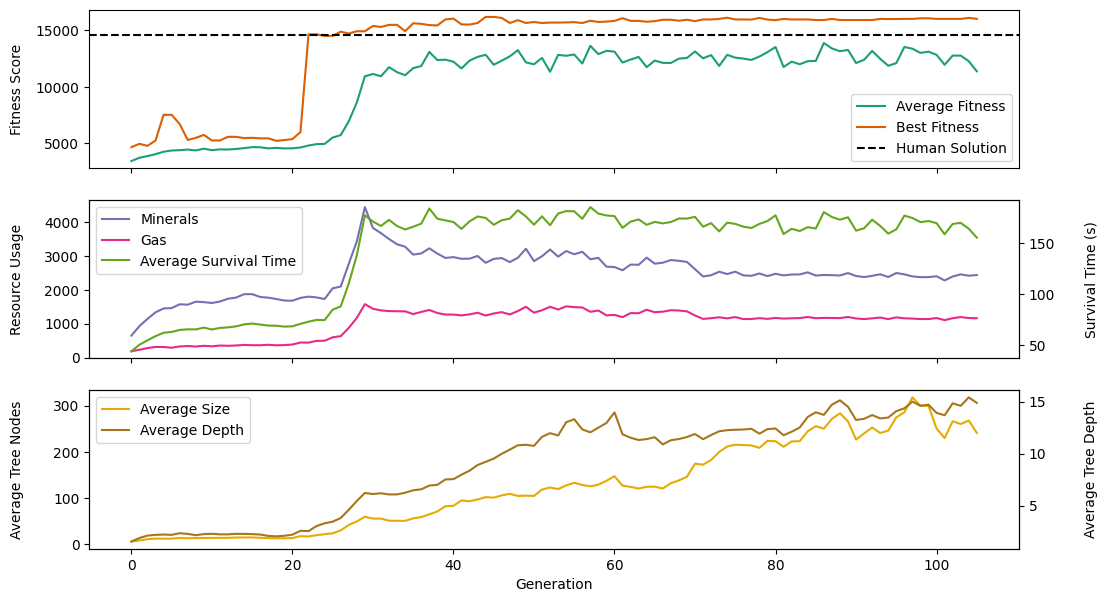

In [10]:
df = pd.read_csv("results/results.csv")
# Create three stacked subplots
fig, axis = plt.subplots(3, 1, sharex=True, figsize=(12, 7))

# Dark2 colour map
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)
cm = plt.cm.Dark2.colors

def _plot_axs1(ax: plt.Axes):
    # Axis one includes Average Fitness + Best Fitness
    ax.plot(df["Average Fitness"], label="Average Fitness", color=cm[0])
    ax.plot(df["Best Fitness"], label="Best Fitness",  color=cm[1])
    ax.axhline(y=14550, color="black", linestyle="--", label="Human Solution")
    ax.legend()
    ax.set_ylabel("Fitness Score")


def _plot_ax2(ax: plt.Axes):
    # Use a different y-axis for time survived
    ax_twin = ax.twinx()
    # Axis two shows resource usage and time survived
    l1 = ax.plot(df["Minerals"], color=cm[2])
    l2 = ax.plot(df["Gas"], color=cm[3])
    l3 = ax_twin.plot(df["Survival Time"], color=cm[4])


    # Set labels
    ax.set_ylabel("Resource Usage")
    ax_twin.set_ylabel("Survival Time (s)")
    ax_twin.yaxis.set_label_coords(1.07, 0.5)

    # Set legend
    ax.legend(l1 + l2 + l3, ["Minerals", "Gas", "Average Survival Time"], loc="upper left")

def _plot_ax3(ax: plt.Axes):
    ax_twin = ax.twinx()
    # Axis three shows the average depth and size of individuals in the population
    l1 = ax.plot(df["Size"], color=cm[5])
    l2 = ax_twin.plot(df["Depth"], color=cm[6])

    # Set labels
    ax.set_ylabel("Average Tree Nodes")
    ax_twin.set_ylabel("Average Tree Depth")

    # Set legend
    ax.legend(l1 + l2, ["Average Size", "Average Depth"])
    ax_twin.yaxis.set_label_coords(1.07, 0.5)

_plot_axs1(axis[0])
_plot_ax2(axis[1])
_plot_ax3(axis[2])

for ax in axis:
    ax.yaxis.set_label_coords(-0.07, 0.5)

axis[2].set_xlabel("Generation")

# save to pdf
plt.savefig("results/results.pdf", bbox_inches="tight")

Average Runtime:
 1 CPU    1201.334037
8 CPU     295.984701
dtype: float64
Standard Deviation:
 1 CPU    17.407624
8 CPU     3.177790
dtype: float64


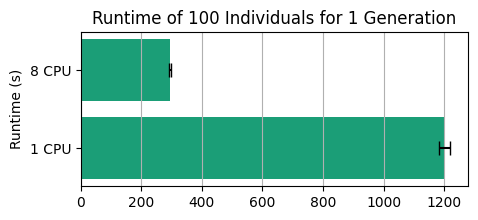

In [11]:
df = pd.read_csv("results/runtime.csv")

average_runtime = df.mean()
stdev_runtime = df.std()

print("Average Runtime:\n", average_runtime)
print("Standard Deviation:\n", stdev_runtime)

# mean and standard deviation bar plot
fig, ax = plt.subplots(figsize=(5, 2))
ax.grid(axis="x")

ax.barh(['1 CPU', '8 CPU'], average_runtime, xerr=stdev_runtime, capsize=5)
ax.set_ylabel("Runtime (s)")
ax.set_title("Runtime of 100 Individuals for 1 Generation")
fig.savefig("results/runtime.pdf", bbox_inches="tight")